# NetworkX
___

source: https://www.slideshare.net/koorukuroo/20140830-pycon2014-networkx 를 보고 작성하였습니다.

NetworkX 는 파이썬에서 복잡한 네트워크의 구조, 역동성, 기능 등을 연구할 수 있게끔 도와주는 package로써 사용이됩니다. 

nerworkx의 특징으로는 

* 무방향성, 방향성, 다중그래프 등의 데이터 구조 등으로 이루어져 있다. 

* 어떤 것이든 node로 표현이 가능하다
 
* Edges에는 자의적인 데이터를  포함하고 있다. 

* 표준적인 그래프 알고리즘 

In [3]:
# networkx 설치

# !pip install networkx

!pip install --upgrade plotly==4.1.1

  Attempting uninstall: plotly
    Found existing installation: plotly 3.0.0
    Uninstalling plotly-3.0.0:
      Successfully uninstalled plotly-3.0.0


먼저 networkx 를 설치해야 하는데 이를 위해 필요한 plotly는 3.0.0 버전이라 맞게끔 설치해 줍니다. 

이후 networkx를 설치하면 문제가 없을 것 같습니다.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt 
#라벨을 항상 보여주기위해 
# nx.draw_op

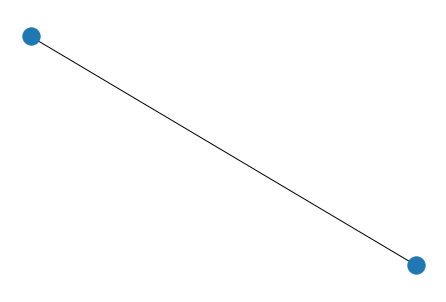

In [6]:
G=nx.Graph()# 빈그래프 구조 G생성
G.add_edge(1,2)# 엣지 추가 
nx.draw(G)# 그래프 G그리기
plt.show()# pyplot으로 보여주기

[(1, 2)]


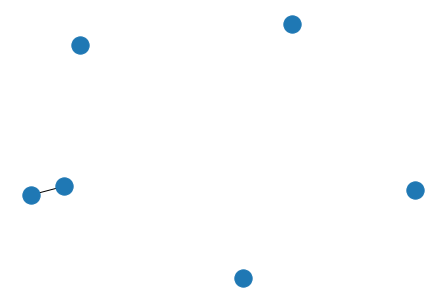

In [7]:
G.add_node("apple")#노드 사과 추가 
G.add_nodes_from(["banana","kiwi","mango"])#리스트로 추가

# fruits=["banana","kiwi","mango"] 
# G.add_nodes_from(fruits)# 변수에 리스트 할 당후 추가 

G.nodes()#노드들 보기 
print(G.edges())#엣지들 보기
nx.draw(G)
plt.show()

In [8]:
G=nx.Graph()
G.add_edge("apple","banana")
G.add_edges_from([("apple","mango"),("apple","kiwi")])#리스트로 추가

#relations=[("apple","mango"),("apple","kiwi")]
#G.add_edges_from(relations)

G.edges()

EdgeView([('apple', 'banana'), ('apple', 'mango'), ('apple', 'kiwi')])

In [9]:
G.nodes['kiwi']['kind']='friut'
G.nodes['kiwi']
G.nodes(data=True)

NodeDataView({'apple': {}, 'banana': {}, 'mango': {}, 'kiwi': {'kind': 'friut'}})

In [10]:
G.add_node('kiwi',kind='fruit')
G.add_nodes_from(['banana','apple'],kind='fruit')
G.nodes['banana']

{'kind': 'fruit'}

In [11]:
G.edges()

EdgeView([('apple', 'banana'), ('apple', 'mango'), ('apple', 'kiwi')])

In [12]:
G.edges(data=True)# 서로 어떤 데이터로 연결이 되었는지를 볼 수 있겠다! 

EdgeDataView([('apple', 'banana', {}), ('apple', 'mango', {}), ('apple', 'kiwi', {})])

In [13]:
relations=[("apple","mango"),("apple","kiwi")]
G.add_edge('apple','mango',weight=2.5)# weight 속성 부여 가능 
G.add_edges_from(relations,color='blue')
G['apple']['mango']['weight']=5


In [14]:
G.edges['apple','kiwi']['weight']=2

In [15]:
G.edges(data=True)

EdgeDataView([('apple', 'banana', {}), ('apple', 'mango', {'weight': 5, 'color': 'blue'}), ('apple', 'kiwi', {'color': 'blue', 'weight': 2})])

지금까지 네트워크의 속성을 넣어보는 과정들을 간략하게 배워보았다. 

이제 한 번 직접 네트워크를 그림으로써 좀 더 네트워크에 대해 자세하게 알아보자

네트워크가 정의되기 위해서는 
* 점 (Objects,Vertices,Nodes,Sites,Actors) 

* 선 (Relations,Edges,Links,Bonds,Ties..) 

와 점의 위치, 총 3개의 개념이 필요하다

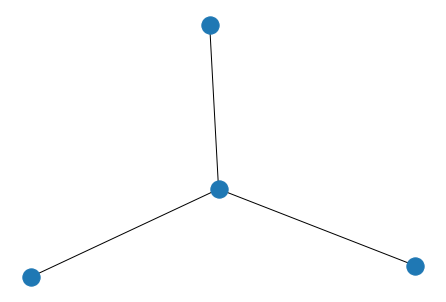

In [16]:
G=nx.Graph()
relations=[('apple','banana'),('kiwi','apple'),('mango','apple')]
G.add_edges_from(relations)# 점, 선 생성 
nx.draw(G) #점의 위치를 SPRING LAYOUT으로 생성하게 된다. 
# nx.draw_circular(G)# 원 위에 노드 놓기
# nx.draw_random(G)#균등분포를 이용한 랜덤
# nx.draw_shell(G)#동심원 위에 노드 놓기
# nx.draw_spectral(G)#그래프 라플라시안의 고유 벡터 기반
# nx.draw_spring(G)
plt.show()

{'apple': array([-7.70288036e-17,  1.11483580e-18]), 'banana': array([ 1.        , -0.31622777]), 'kiwi': array([-0.5       , -0.66346995]), 'mango': array([-0.5       ,  0.97969772])}


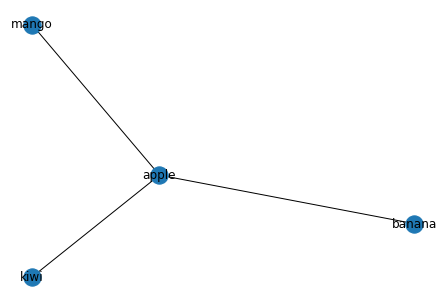

In [17]:
pos= nx.spectral_layout(G)
print(pos)# node가 있는 위치가 찍히게 됩니다.
nx.draw(G,pos,with_labels=True)
plt.show()

# 각 점의 특징 계산 

In [18]:
G.nodes()

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [19]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [20]:
# 각 노드의 edge의 갯수를 보여준다
print(G.degree())

[('apple', 3), ('banana', 1), ('kiwi', 1), ('mango', 1)]


# Degree에 따른 노드의 크기 변화

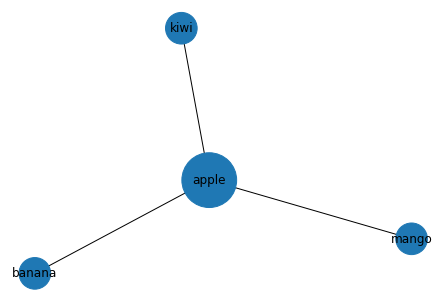

In [21]:
relations=[('kiwi','apple'),('mango','apple'),('apple','banana')]
G.add_edges_from(relations)
degree=nx.degree(G)
nx.draw(G,node_size=[v[1]*1000 for v in degree],with_labels=True)# degree.values가 없어져서 이제 이렇게 해야 합니다.
plt.show()

`nx.draw(G,pos=None,ax=None,hold=None,**kwds)`

> kwds에는 pos, with_labels,ax,nodelist,edgelist,node_size,node_Color,node_shape,alpha,cmap,vmin...등등이 들어있다! 

# Degree Rank 그리기

In [22]:
import networkx as nx
import matplotlib.pyplot as plt 
G=nx.gnp_random_graph(100,0.02) # binomial _graph 생성

In [23]:
a=dict(nx.degree(G))
print(a.values())

dict_values([1, 4, 5, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 1, 4, 2, 4, 2, 1, 0, 2, 3, 5, 2, 1, 4, 4, 4, 1, 4, 2, 4, 1, 2, 1, 2, 1, 4, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 4, 1, 4, 4, 2, 4, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 4, 5, 1, 2, 1, 0, 0, 1, 0, 4, 4, 0, 4, 2, 6, 5, 2, 5, 0, 3, 1, 5, 1, 4, 0, 6, 2, 1, 2])


In [24]:
degree_sequence=sorted(dict(nx.degree(G)).values(),reverse=True) #Degree list 값 생성 
dmax=max(degree_sequence)

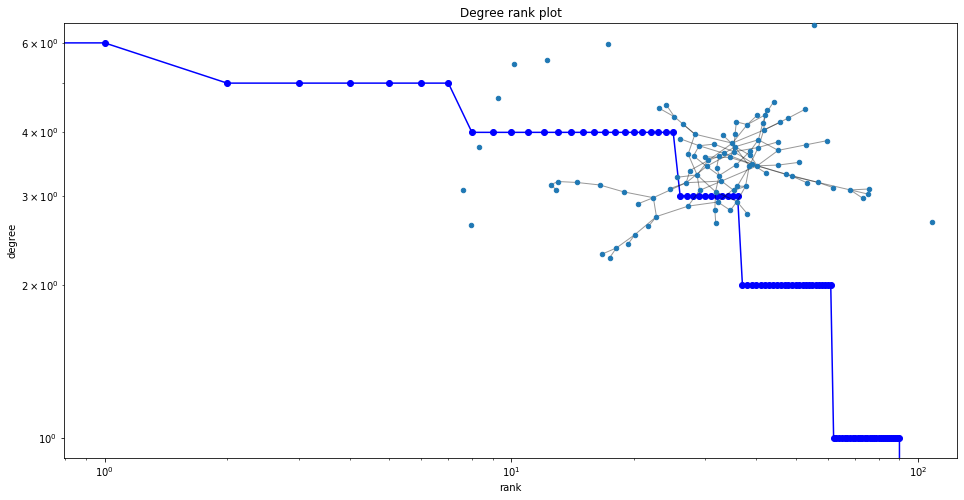

In [25]:
plt.figure(figsize=[16,8])
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

#draw gra[h in inset]
plt.axes([0.45,0.45,0.45,0.45])
pos=nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G,pos,node_size=20)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.show()

# Degree 분포 그리기


In [26]:
import numpy as np

In [27]:
G=nx.gnp_random_graph(100,0.02)


In [28]:
degrees=list(dict(G.degree).values())
dmax=max(degrees)

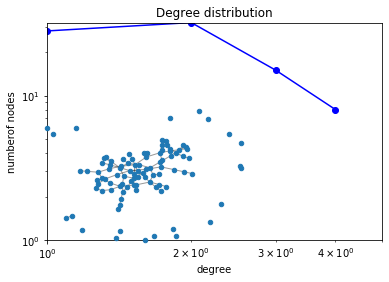

In [29]:
h,bins= np.histogram(degrees,bins=dmax)
hmax=max(h)
plt.axis([1,dmax,1,hmax])
x=bins.compress(h)
y=h.compress(h)

plt.loglog(x,y,'bo-')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("numberof nodes")

plt.axes([0.1,0.1,0.5,0.5])
pos=nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G,pos,node_size=20)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.show()

네트워크 -> 행렬 -> $?_2$

In [30]:
import networkx as nx 
import matplotlib.pyplot as plt 

G=nx.Graph()

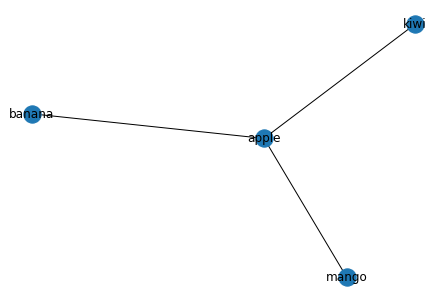

In [31]:
relations=[("apple","mango"),("kiwi","apple"),("banana","apple")]
G.add_edges_from(relations)
nx.draw(G,with_labels=True)
plt.show()

In [32]:
G.nodes()

NodeView(('apple', 'mango', 'kiwi', 'banana'))

In [33]:
A=nx.to_numpy_matrix(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [34]:
#제곱은 각 NODE에서 NODE까지 다른 노드까지 갈 수 있는 총 경우의 수를 말한다(중복을 허용 )
print(A**2)

[[3. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]


In [35]:
# 최단 경로 알고리즘 
# nx.shortest_path(G)
# nx.average_shortest_path_length(G)
nx.has_path(G,"apple","banana")

True

In [36]:
# 네트워크의 중심성 
nx.betweenness_centrality(G)

{'apple': 1.0, 'mango': 0.0, 'kiwi': 0.0, 'banana': 0.0}

In [37]:
nx.closeness_centrality(G)

{'apple': 1.0, 'mango': 0.6, 'kiwi': 0.6, 'banana': 0.6}

In [38]:
nx.degree_centrality(G)

{'apple': 1.0,
 'mango': 0.3333333333333333,
 'kiwi': 0.3333333333333333,
 'banana': 0.3333333333333333}

네트워크 -> 행렬 -> $?_3$

In [39]:
# 행렬의 고유값, 고유 벡터 
A=nx.to_numpy_matrix(G)
[w,v]=np.linalg.eig(A)
print(w)# eigenvalues
print(v)# normalized eigenvectors

[ 1.73205081 -1.73205081  0.          0.        ]
[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.40824829 -0.40824829 -0.57735027 -0.57735027]
 [ 0.40824829 -0.40824829  0.78867513 -0.21132487]
 [ 0.40824829 -0.40824829 -0.21132487  0.78867513]]


In [40]:
# 고유벡터 중심성
nx.eigenvector_centrality(G)

{'apple': 0.7071068780398428,
 'mango': 0.4082482345455792,
 'kiwi': 0.4082482345455792,
 'banana': 0.4082482345455792}

# Les miserables Network 

In [41]:
import pandas as pd 
edge=pd.read_csv("./net_data/les_miserable_edge.csv")
node=pd.read_csv("./net_data/les_miserable_node.csv")

In [42]:
node.head()

,Id,Label,modularity_class
0,11,Valjean,1
1,48,Gavroche,8
2,55,Marius,6
3,27,Javert,7
4,25,Thenardier,7


In [43]:
print(len(node))

77


In [44]:
edge.head()

,Source,Target,Weight
0,1,0,1
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1


In [45]:
print(len(edge))

254


# Construct network

In [46]:
G=nx.Graph()
for idx,row in node.iterrows():
    G.add_node(row['Id'],Label=row['Label'],modularity_class=row['modularity_class'])
    
for idx,row in edge.iterrows():
    G.add_edge(row['Source'],row['Target'],Weight=int(row['Weight']))

In [47]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [48]:
G.nodes(data=True) # 잘 들어갔습니다

NodeDataView({11: {'Label': 'Valjean', 'modularity_class': 1}, 48: {'Label': 'Gavroche', 'modularity_class': 8}, 55: {'Label': 'Marius', 'modularity_class': 6}, 27: {'Label': 'Javert', 'modularity_class': 7}, 25: {'Label': 'Thenardier', 'modularity_class': 7}, 23: {'Label': 'Fantine', 'modularity_class': 2}, 58: {'Label': 'Enjolras', 'modularity_class': 8}, 62: {'Label': 'Courfeyrac', 'modularity_class': 8}, 64: {'Label': 'Bossuet', 'modularity_class': 8}, 63: {'Label': 'Bahorel', 'modularity_class': 8}, 65: {'Label': 'Joly', 'modularity_class': 8}, 24: {'Label': 'MmeThenardier', 'modularity_class': 7}, 26: {'Label': 'Cosette', 'modularity_class': 6}, 41: {'Label': 'Eponine', 'modularity_class': 7}, 57: {'Label': 'Mabeuf', 'modularity_class': 8}, 59: {'Label': 'Combeferre', 'modularity_class': 8}, 61: {'Label': 'Feuilly', 'modularity_class': 8}, 0: {'Label': 'Myriel', 'modularity_class': 0}, 66: {'Label': 'Grantaire', 'modularity_class': 8}, 68: {'Label': 'Gueulemer', 'modularity_class

# Export data

In [49]:
# nx.(G,"Les_miserables.gexf")# gephi 

# Visualization

Text(0.5, 1.0, 'Les miserable adjacency matrix')

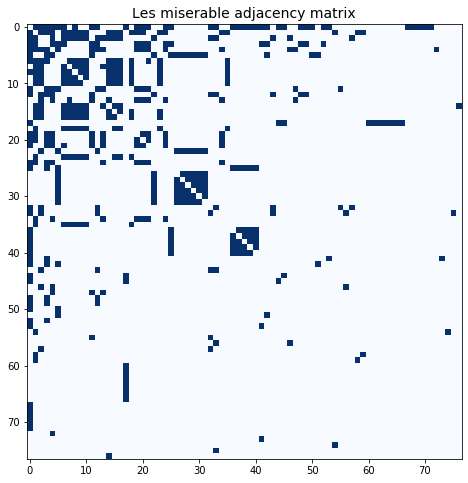

In [50]:
# show adhacency matrix 
A=nx.to_numpy_matrix(G, dtype=np.bool)#adjacency matrix
plt.figure(1,figsize=(8,8))
plt.imshow(A,cmap="Blues",interpolation="none")#color mapa
plt.title("Les miserable adjacency matrix", fontsize=14)

In [51]:
nx.degree(G)

DegreeView({11: 36, 48: 22, 55: 19, 27: 17, 25: 16, 23: 15, 58: 15, 62: 13, 64: 13, 63: 12, 65: 12, 24: 11, 26: 11, 41: 11, 57: 11, 59: 11, 61: 11, 0: 10, 66: 10, 68: 10, 69: 10, 70: 10, 16: 9, 60: 9, 71: 9, 29: 8, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 7, 49: 7, 51: 7, 75: 7, 76: 7, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 28: 4, 31: 4, 54: 4, 2: 3, 3: 3, 39: 3, 42: 3, 43: 3, 72: 3, 12: 2, 30: 2, 33: 2, 44: 2, 47: 2, 50: 2, 52: 2, 56: 2, 73: 2, 74: 2, 1: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 13: 1, 14: 1, 15: 1, 32: 1, 40: 1, 45: 1, 46: 1, 53: 1, 67: 1})

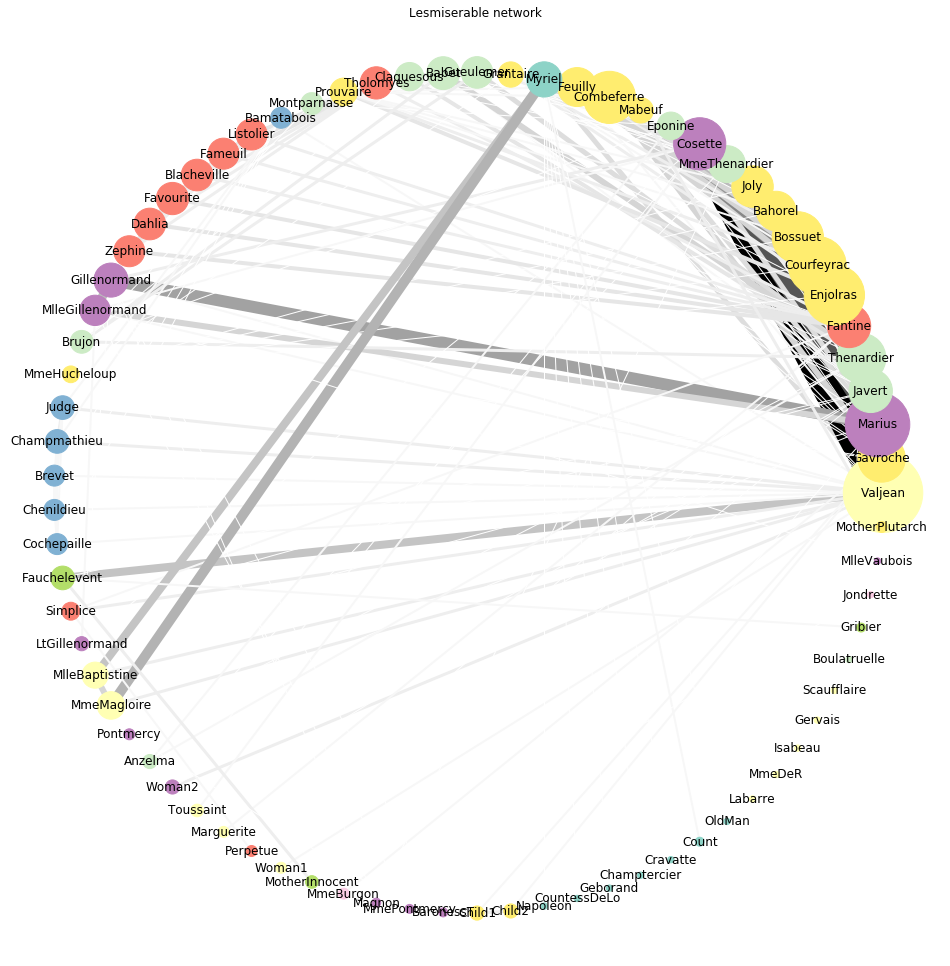

In [52]:
dic_=dict(nx.degree(G,weight="Weight"))# DEGREE OF NETWORK 
d=np.array(list(dic_.values()))# make it list 
modul=nx.get_node_attributes(G,"modularity_class")
weight=nx.get_edge_attributes(G,"Weight")

# pos=nx.spring_layout(G,iterations=200,k=2)# positions for all nodes
pos=nx.circular_layout(G,scale=1)# positions for all nodes
#k= optimal distance between nodes(default=1/sqrt(n))
#iterations=number of iterations of spring force relaxation 

plt.figure(figsize=(13,13))
nx.draw(G,pos,labels=nx.get_node_attributes(G,'Label')#give label using attributes
       ,node_size=d*40 #node size
       ,node_color=list(modul.values())#data for node color 
       ,font_size=12# label size
       ,cmap=plt.cm.Set3 #color map for node
       ,edge_color=list(weight.values())#data for edge color 
       ,width=list(weight.values())# edge width 
       ,edge_cmap=plt.cm.gist_yarg# colormap for edge\
       )
plt.title("Lesmiserable network")
plt.show()